In [19]:
import sklearn

# Make sure we can see all of the model details.
sklearn.set_config(print_changed_only=False)

# Intro to image classification with Scikit-Learn

What about when the records are images? How can we make a machine learning model from those?

This notebook only uses `scikit-learn`; later we'll solve this problem with neural networks too.

We're also going to cheat a bit by loading pre-processed NumPy arrays. Getting images into this format is not too hard, but it can be a little fiddly if they are all very different from each other.

## Loading images in Python

Several libraries can do this, e.g.

- `PIL.Image` — powerful, standard
- `matplotlib.pyplot.imread()` — convenient
- `scikit-image` — great for image processing
- `pytorch` — image handling for deep learning applications

🚨 **Save this image in your `../data` folder:**

![Ammonite](https://geocomp.s3.amazonaws.com/data/Random_ammonite.jpeg)

In [20]:
import matplotlib.pyplot as plt

arr = plt.imread('../data/Random_ammonite.jpeg')

arr
# 🚨 If you get an error, be sure to save the image above into your data folder first!

FileNotFoundError: [Errno 2] No such file or directory: '../data/Random_ammonite.jpeg'

We can plot the image using `imshow`:

In [21]:
plt.imshow(arr)

NameError: name 'arr' is not defined

To load the image, `matplotlib` is actually using the Python Image Library, PIL, under the hood. (By the way, to install `PIL` you must actually do `pip install pillow`, which was a port of PIL and is now the standard version.)

We can bypass `matplotlib` and use PIL directly. This option is good to know about, because PIL can load almost any kind of image.

In [22]:
from PIL import Image

img = Image.open('../data/Random_ammonite.jpeg')

img

FileNotFoundError: [Errno 2] No such file or directory: '../data/Random_ammonite.jpeg'

Notice that the repr of a `PIL.Image` renders the actual image.

It's not too hard to read an image directly from a URL:

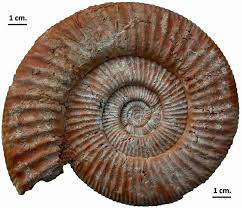

In [23]:
from PIL import Image
import urllib

url = "https://geocomp.s3.amazonaws.com/data/Random_ammonite.jpeg"

img = Image.open(urllib.request.urlopen(url))
img

We can cast the `PIL.Image` to a NumPy array:

In [24]:
import numpy as np

im = np.array(img)

im

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]]

Notice that it contains unsigned 8-bit integers in the range 0-255:

In [25]:
im.dtype

dtype('uint8')

You'll often want to normalize to the range 0–1, which is easy enough:

In [26]:
im / 255

array([[[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686]],

       ...,

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0

For machine learning applications, we'll also often want to flatten images into vectors:

In [27]:
im.ravel()

array([253, 253, 253, ..., 253, 253, 253], dtype=uint8)

In [28]:
im.ravel().shape

(151008,)

Notice that we have just created a 151,008-dimensional dataset! Thanks to **the curse of dimensionality**, this is a problem. We'll deal with it later.

## Load `X` and `y`

I have prepared some images for machine learning. Let's load our `X` and `y`:

In [29]:
import numpy as np

ds = np.DataSource('../data/')

X = np.load(ds.open('https://geocomp.s3.amazonaws.com/data/fossils_X.npy', mode='rb'))
y = np.load(ds.open('https://geocomp.s3.amazonaws.com/data/fossils_y.npy', mode='rb'))

In [30]:
X.shape, y.shape

((586, 1024), (586,))

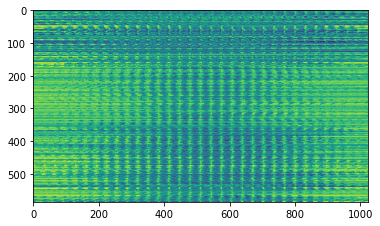

In [31]:
plt.imshow(X)

We have 3 classes:

In [32]:
np.unique(y)

array(['ammonites', 'fish', 'trilobites'], dtype='<U10')

### EXERCISE

Each row in `X` is an image of size 32 &times; 32 pixels. Can you select one random image and plot it using `plt.imshow()`? <a title="You can use arr.reshape(new_shape) to reshape an array arr."><b>HINT</b></a>

If you get that done, try selecting 4 random images and printing the class of each as a plot title.

In [33]:
# YOUR CODE HERE



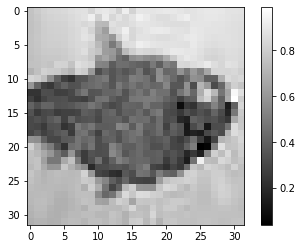

In [34]:
import matplotlib.pyplot as plt

plt.imshow(X[190].reshape(32, 32), cmap='gray')
plt.colorbar()

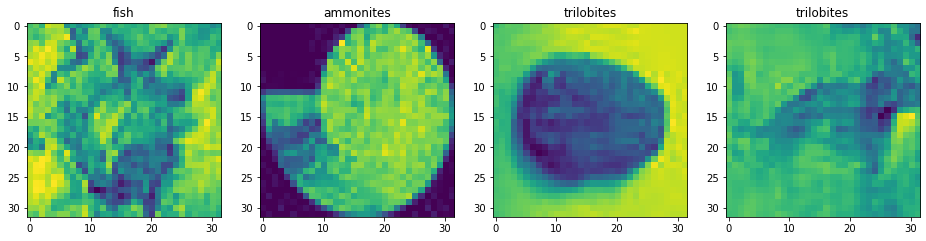

In [35]:
fig, axs = plt.subplots(ncols=4, figsize=(16, 4))

imgs = np.random.choice(X.shape[0], size=4)

for ax, img, cls in zip(axs, X[imgs], y[imgs]):
    ax.imshow(img.reshape(32, 32))
    ax.set_title(cls)

## Split the data into train and test sets

### EXERCISE

Split the data so that 15% of the images go into a **validation** set called `X_val` and `y_val`.

In [38]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE


In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

In [40]:
X_train.shape, y_train.shape, X_val.shape

((498, 1024), (498,), (88, 1024))

## Train a 'shallow' model

Even in an image classification task, you should start with a shallow learning model. This will give you something to beat with a neural network (if you can!).

### EXERCISE

Implement a random forest classifier and predict the labels for the validation set. You should get performance around 65% weighted average F1.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# YOUR CODE HERE (about 4 lines of code)


In [49]:
clf = RandomForestClassifier(max_depth=6, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print(classification_report(y_val, y_pred, digits=3))

              precision    recall  f1-score   support

   ammonites      0.667     0.714     0.690        28
        fish      0.743     0.765     0.754        34
  trilobites      0.478     0.423     0.449        26

    accuracy                          0.648        88
   macro avg      0.629     0.634     0.631        88
weighted avg      0.640     0.648     0.643        88



## Looking more closely at validation

Here's the first validation example:

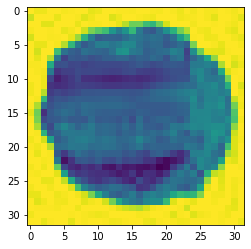

In [50]:
plt.imshow(X_val[0].reshape(32, 32))

The true label:

In [51]:
y_val[0]

'trilobites'

The prediction:

In [52]:
y_pred[0]

'ammonites'

Wrong! (Note: You'll need to use `random_state=42` in both the test split and the classifier for this to work out for sure!)

Let's look at the probabilities:

In [53]:
y_prob = clf.predict_proba(X_val)

y_prob[0]

array([0.50765168, 0.03852025, 0.45382806])

In [54]:
clf.classes_

array(['ammonites', 'fish', 'trilobites'], dtype='<U10')

So the classifier's second guess would have been correct.

Let's look at how we did on several examples. To use my visualization function, we need integer-encoded labels, not 

In [55]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)

# Encode both the train and val labels.
y_train_enc = encoder.transform(y_train)
y_val_enc = encoder.transform(y_val)

y_val_enc

array([2, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1,
       0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2])

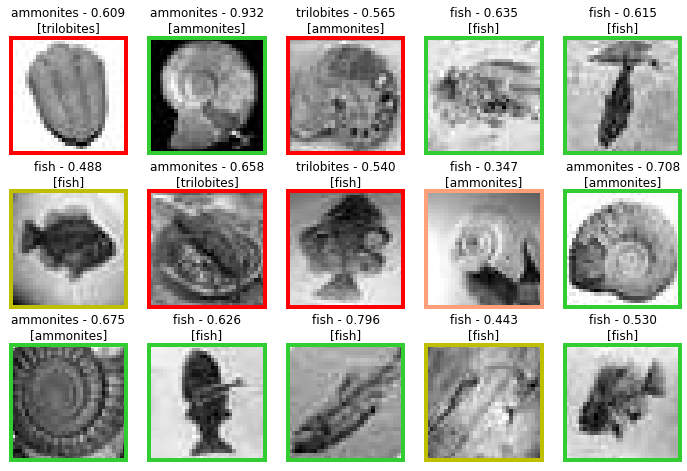

In [58]:
import mlutils

mlutils.visualize(X_val, y_val_enc, y_prob,
                ncols=5, nrows=3, shape=(32, 32),
                classes=clf.classes_, cutoff=0.5
               )

## Improving the score

Can you think of some ways we could improve this model?

Remember, we could improve the score but end up with an overfit model. We want a model that generalizes well &mdash; that's what we mean by 'improve'.

- More data! E.g. label more images, or generate more! Augmentation and GANs.
- Add attributes (more features).
- More sophisticated models (more parameters).
- Regularization.

More complicated ideas:

- Larger images, or images with different sizes, would make a more useful model, but it will be harder to train a good model.

----

# Intro to Machine Learning students stop here.

----

## Augmentation

We'd really like a lot of data (especially if we're going to train a neural net!). It seems like it should help to increase the size of the dataset... but without having to collect more examples. 

For example, let's flip the image above:

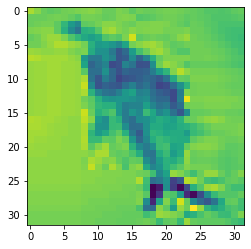

In [59]:
img = X_train[1].reshape(32,32)

plt.imshow(img)

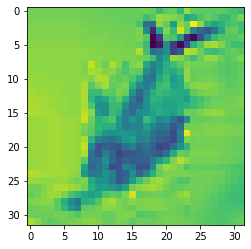

In [60]:
flipped = np.flip(img, axis=0)

plt.imshow(flipped)

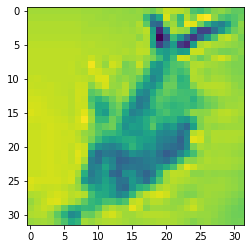

In [61]:
from scipy.ndimage import zoom

cropped = zoom(flipped, 1.1)

cropped = cropped[1:-2, 1:-2]

plt.imshow(cropped)

### EXERCISE

- Write a function to randomly flip each record in `X_train`. (It's okay to use a loop for this.)
- Add your new flipped records to `X_train`, and their labels to `y_train`.
- Stretch goal: can you add random zooming too? It's a bit harder to manage, because you need to crop back to 32 &times; 32.

In [62]:
# YOUR CODE HERE



In [63]:
def centre_crop(img, shape=(32, 32)):
    """
    Centre-crop an image to the given size.
    
    Example:
    >>> import numpy as np
    >>> img = np.arange(35*35).reshape(35, 35)
    >>> out = centre_crop(img)
    >>> out[0, 0] == 37 - 1
    True
    >>> out[-1, -1] == 35**2 - 2*35 - 2 - 1
    True
    """
    h, w = img.shape
    hnew, wnew = shape

    top, left = (h - hnew) // 2, (w - wnew) // 2
    bottom, right = hnew + top - h, wnew + left - w
    
    return img[top:bottom, left:right]


import doctest

doctest.testmod()

TestResults(failed=0, attempted=5)

In [67]:
def random_flip_crop(X, y, shape=(32, 32)):
    """Randomly flip and crop every image in X."""
    new_X, new_y = [], []
    for x_i, y_i in zip(X, y):
        x_i = x_i.reshape(shape)
        flipped = np.flip(x_i, axis=np.random.choice([0, 1]))
        zoomed = zoom(flipped, np.random.choice([1.1, 1.2]))
        new_X.append(centre_crop(zoomed).ravel())
        new_y.append(y_i)
       
    return np.vstack([X, np.array(new_X)]), np.hstack([y, new_y])

X_aug, y_aug = random_flip_crop(X_train, y_train)

X_aug.shape, y_aug.shape

((996, 1024), (996,))

In [66]:
# Another implementation.

def flip_image_randomly(arr, shape=(32, 32)):
    """
    Flip an image u/d or l/r.
    """
    img = arr.reshape(shape)
    axis = np.random.choice([0, 1])
    return np.flip(img, axis=axis).ravel()

def crop_image_randomly(arr, shape=(32, 32)):
    """
    Crop an image by none or a bit.
    """
    img = arr.reshape(shape)
    amount = np.random.choice([1, 1.125, 1.25])
    img = zoom(img, zoom=amount)
    crop = int(32 * (amount - 1) // 2)
    img = img[crop:-crop or None, crop:-crop or None]
    assert img.shape == (32, 32)
    return img.ravel()

def augment(X, y):
    """
    Randomly augment the array X.
    """
    augmented = np.apply_along_axis(flip_image_randomly, axis=1, arr=X)
    augmented = np.apply_along_axis(crop_image_randomly, axis=1, arr=augmented)
    return np.vstack([X, augmented]), np.hstack([y, y])

### EXERCISE

Use the augmented dataset to train another model like the first one. Do the new features help?

In [68]:
# YOUR CODE HERE



In [72]:
clf = RandomForestClassifier(max_depth=6, random_state=42)

clf.fit(X_aug, y_aug)

y_pred = clf.predict(X_val)

print(classification_report(y_val, y_pred, digits=3))

# There is a small uplift, from 0.64 to 0.66 or so.

              precision    recall  f1-score   support

   ammonites      0.690     0.714     0.702        28
        fish      0.714     0.735     0.725        34
  trilobites      0.542     0.500     0.520        26

    accuracy                          0.659        88
   macro avg      0.649     0.650     0.649        88
weighted avg      0.655     0.659     0.657        88



## Convolution

Convolutional networks replace the weights with kernels, and the multiplication step with convolution.

Let's see what convolution can do to an image.

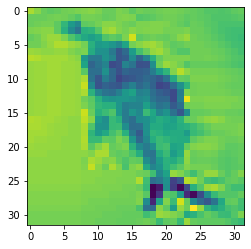

In [73]:
plt.imshow(img)

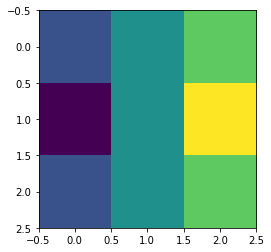

In [74]:
kernel = np.array([[-1, 0, 1],   # Sobel edge detector
                   [-2, 0, 2],
                   [-1, 0, 1]])

plt.imshow(kernel)

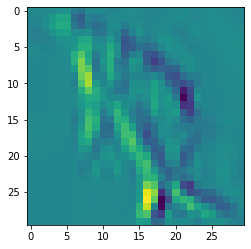

In [75]:
from scipy.signal import convolve2d

attr = convolve2d(img, kernel, mode='valid')

plt.imshow(attr)

### EXERCISE

Compute the convolution in both directions (transpose the kernel for the other orientiation), then compute the square root of the sum of their squares. This is the gradient magnitude.

In [ ]:
# YOUR CODE HERE



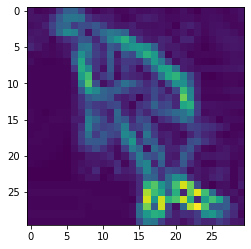

In [85]:
def edge_detect(img):
    """
    Compute the edge detection attribute of the image.
    """
    img = img.reshape(32, 32)
    g1 = convolve2d(img, kernel, mode='valid')
    g2 = convolve2d(img, kernel.T, mode='valid')
    return np.sqrt(g1**2 + g2**2)

plt.imshow(edge_detect(img))

### EXERCISE

Use this attribute in the learning model; does it help?

In [ ]:
# YOUR CODE HERE



In [ ]:
edges = np.apply_along_axis(edge_detect, axis=-1, arr=X_aug)
X_attr = np.hstack([X_aug, edges.reshape(-1, 30*30)])
y_attr = y_aug
X_attr.shape

In [137]:
clf = RandomForestClassifier(max_depth=6, random_state=42)

clf.fit(X_attr, y_aug)

y_pred = clf.predict(X_val_attr)

print(classification_report(y_val, y_pred, digits=3))

# There is another uplift, from 0.66 to 0.71 or so.

              precision    recall  f1-score   support

   ammonites      0.786     0.786     0.786        28
        fish      0.750     0.882     0.811        34
  trilobites      0.550     0.423     0.478        26

    accuracy                          0.716        88
   macro avg      0.695     0.697     0.692        88
weighted avg      0.702     0.716     0.705        88



Let's see how a neural network does.

In [138]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=[400, 200, 100, 24], max_iter=500)
clf.fit(X_attr, y_aug)
y_pred = clf.predict(X_val_attr)
print(classification_report(y_val, y_pred))

# This does quite well too.

              precision    recall  f1-score   support

   ammonites       0.88      0.75      0.81        28
        fish       0.78      0.74      0.76        34
  trilobites       0.62      0.77      0.69        26

    accuracy                           0.75        88
   macro avg       0.76      0.75      0.75        88
weighted avg       0.76      0.75      0.75        88



## Dimensionality reduction

In high-dimensional datasets (i.e. ones with a lot of features), sometimes it helps to reduce the number of dimensions.

### Principal component analysis (PCA)

Let's try PCA; it works just like any other `sklearn` model, except that it's **unsupervised** so the `fit` step does not need to see the labels.

In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X_train)

X_train_2 = pca.transform(X_train)

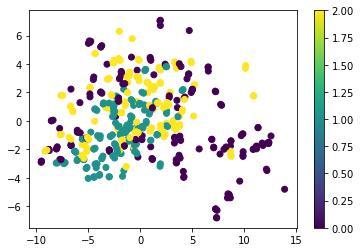

In [105]:
plt.scatter(*X_train_2.T, c=y_train_enc, )
plt.colorbar()
plt.show()

In [106]:
encoder.classes_

array(['ammonites', 'fish', 'trilobites'], dtype='<U10')

We can look at the components themselves. They are directions in our original feature space -- so they can be interpreted as feature vectors.

We can call these **'eigenfossils'**.

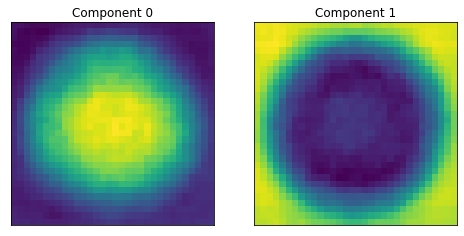

In [107]:
no_ticks = {'xticks': [], 'yticks': []}
fig, axs = plt.subplots(ncols=2, figsize=(8, 4), subplot_kw=no_ticks)
for i, (ax, comp) in enumerate(zip(axs, pca.components_)):
    ax.imshow(comp.reshape(32, 32))
    ax.set_title(f"Component {i}")

It's a bit more interesting with more components:

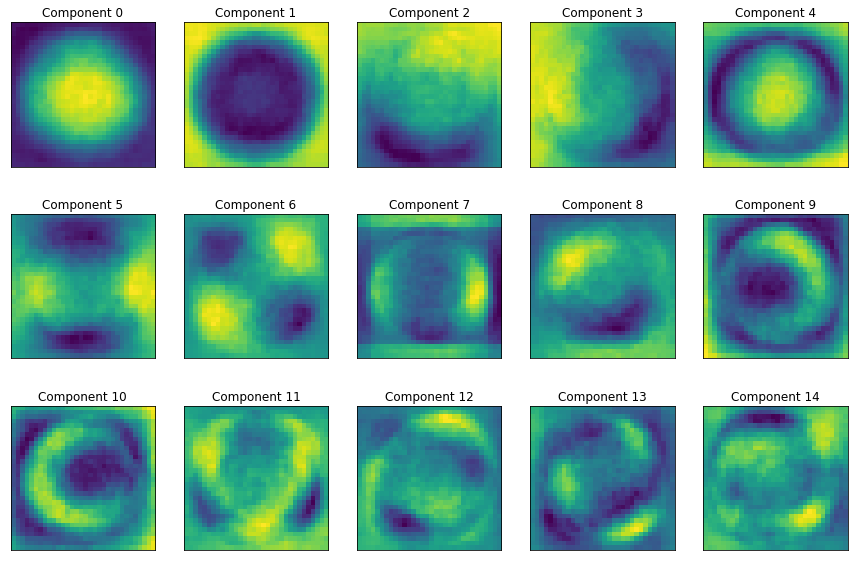

In [108]:
pca = PCA(n_components=50).fit(X_train)

fig, axs = plt.subplots(3, 5, figsize=(15, 10), subplot_kw={'xticks': [], 'yticks': []})
for i, (ax, comp) in enumerate(zip(axs.ravel(), pca.components_)):
    ax.imshow(comp.reshape(32, 32))
    ax.set_title(f"Component {i}")

### t-statistic neighbourhood embedding (t-SNE)

We can also try t-SNE, which typically does better than PCA for visualizing a dataset in two dimensions:

In [109]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

X_train_tsne = tsne.fit_transform(X_train)

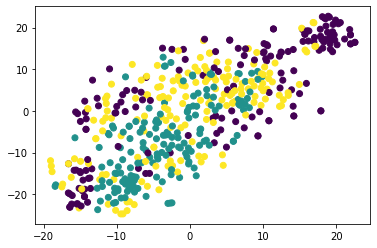

In [110]:
plt.scatter(*X_train_tsne.T, c=y_train_enc)

## Train the model on reduced data

We'll just use PCA here, because t-SNE is not guaranteed to be a metric space.

### EXERCISE

- Create a PCA decomposition with 50 components and transform `X_train` and `X_val`.
- Train a new model on the transformed data, and validate on the transformed validation data.
- Do you get a better result than before?

**Stretch goal:** put the PCA transformer and the estimator into a pipeline and use cross-validation grid-search to find the optimal number of principal components to use.

In [111]:
# YOUR CODE HERE


In [112]:
pca = PCA(n_components=50)
pca.fit(X_train)
X_train_50 = pca.transform(X_train)
X_val_50 = pca.transform(X_val)

In [113]:
clf = RandomForestClassifier()
clf.fit(X_train_50, y_train)
y_pred = clf.predict(X_val_50)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

   ammonites       0.88      0.75      0.81        28
        fish       0.72      0.68      0.70        34
  trilobites       0.47      0.58      0.52        26

    accuracy                           0.67        88
   macro avg       0.69      0.67      0.67        88
weighted avg       0.69      0.67      0.68        88



In [114]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pca = PCA()
rfc = RandomForestClassifier(min_samples_leaf=3)
pipe = Pipeline(steps=[('pca', pca), ('rfc', rfc)])

param_grid = {
    'pca__n_components': np.logspace(0.5, 3, 6, dtype=int),
    'rfc__max_depth': [3, 5, 7, 9],
}

cv = GridSearchCV(pipe, param_grid, n_jobs=6, verbose=5)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/matt/miniconda3/envs/geoml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/matt/miniconda3/envs/geoml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/matt/miniconda3/envs/geoml/lib/python3.9/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/matt/miniconda3/envs/geoml/lib/python3.9/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/matt/miniconda3/envs/geoml/lib/python3.9/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/home/matt/miniconda3/envs/geoml/lib/python3.9/site-packages/sklearn/p

/home/matt/miniconda3/envs/geoml/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.58636364 0.62454545 0.65056566 0.66864646 0.62448485 0.65270707
 0.65666667 0.66872727 0.59844444 0.64856566 0.64866667 0.64468687
 0.60840404 0.62256566 0.63860606 0.63860606 0.52812121 0.52812121
 0.54812121 0.56828283        nan        nan        nan        nan]
  warnings.warn(


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
   

In [115]:
cv.best_params_

{'pca__n_components': 10, 'rfc__max_depth': 9}

In [116]:
y_pred = cv.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

   ammonites       0.83      0.68      0.75        28
        fish       0.76      0.76      0.76        34
  trilobites       0.58      0.69      0.63        26

    accuracy                           0.72        88
   macro avg       0.72      0.71      0.71        88
weighted avg       0.73      0.72      0.72        88



## One more thing...

It's fun to play with adding principal components:

In [117]:
pca = PCA(n_components=200, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

In [121]:
from ipywidgets import interact

@interact(instance=(0, 498, 1), components=(1, 201, 5))
def show(instance, components):
    img = (X_train_pca[instance] * pca.components_.T).T
    _, ax = plt.subplots(figsize=(8, 8), subplot_kw=no_ticks)
    im = np.sum(img[:components], axis=0)
    ax.imshow(im.reshape(32, 32))
    ax.set_title(f"First {components} components of instance {instance}")
    plt.show()
    return

interactive(children=(IntSlider(value=249, description='instance', max=498), IntSlider(value=101, description=…

## Dimensionality reduction on MNIST Handwritten Digits dataset

Just for fun, let's compare PCA with t-SNE on (a subset of) the famous MNIST digits dataset:

In [122]:
from sklearn.datasets import load_digits

digits = load_digits()

digits.data.shape

(1797, 64)

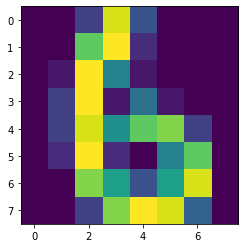

In [123]:
plt.imshow(digits.data[234].reshape(8, 8,))

### EXERCISE

Can you adapt the code above to make (1) the 2-component PCA decomposition and (2) the 2-component t-SNE manifold? Then try crossplotting the 2 components for each decomposition, as we did before. Which one is better?

Give it a try before you scroll down for the solution.

In [124]:
# YOUR CODE HERE



In [125]:
pca = PCA(n_components=2).fit(digits.data)
digits_pca = pca.transform(digits.data)

tsne = TSNE(n_components=2, random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

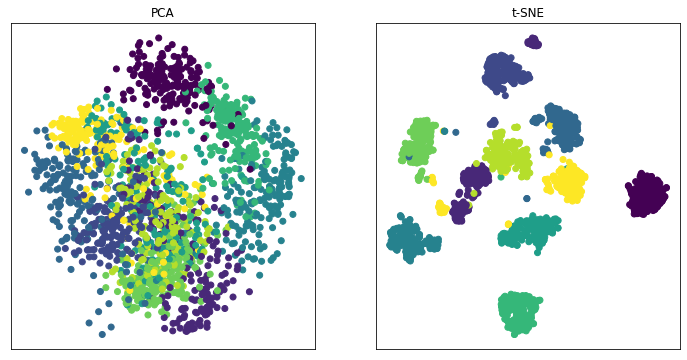

[CV 3/5] END pca__n_components=3, rfc__max_depth=3;, score=0.630 total time=   0.2s
[CV 3/5] END pca__n_components=3, rfc__max_depth=5;, score=0.620 total time=   0.2s
[CV 5/5] END pca__n_components=3, rfc__max_depth=7;, score=0.576 total time=   0.2s
[CV 2/5] END pca__n_components=10, rfc__max_depth=3;, score=0.600 total time=   0.2s
[CV 3/5] END pca__n_components=10, rfc__max_depth=5;, score=0.750 total time=   0.2s
[CV 5/5] END pca__n_components=10, rfc__max_depth=7;, score=0.616 total time=   0.2s
[CV 3/5] END pca__n_components=31, rfc__max_depth=3;, score=0.640 total time=   0.2s
[CV 5/5] END pca__n_components=31, rfc__max_depth=5;, score=0.606 total time=   0.2s
[CV 1/5] END pca__n_components=31, rfc__max_depth=9;, score=0.560 total time=   0.3s
[CV 2/5] END pca__n_components=100, rfc__max_depth=3;, score=0.570 total time=   0.3s
[CV 5/5] END pca__n_components=100, rfc__max_depth=5;, score=0.616 total time=   0.3s
[CV 1/5] END pca__n_components=100, rfc__max_depth=9;, score=0.590

In [126]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6), subplot_kw=no_ticks)
axs[0].set_title('PCA')
axs[0].scatter(*digits_pca.T, c=digits.target)
axs[1].set_title('t-SNE')
axs[1].scatter(*digits_tsne.T, c=digits.target)
plt.show()

&copy; 2021 Agile Scientific, licensed CC-BY